# K-Nearest Neighbors (KNN)

In this in-class assignment, you will be applying the K-Nearest Neighbors algorithm to a new dataset. This will test your understanding of the KNN algorithm, data preprocessing, model training, and evaluation that you learned in Lab 4.

## Objectives

1. Load and preprocess the dataset.
2. Perform exploratory data analysis.
3. Implement the KNN algorithm.
4. Train and test your model.
5. Evaluate the model's performance.

## Dataset

For this assignment, we will be using a synthetic dataset that simulates customer behavior data. The dataset contains various features related to customer's purchasing behavior and a target variable indicating customer segment. Your task will be to predict the customer segment based on the given features.

In [76]:
#Load relevant librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [77]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Instructions

1. Load the dataset provided in the file `HW3_customer_data.csv`.
2. Visualize and normalize the data.   
4. Split the dataset into training and testing sets.
5. Use the KNeighborsClassifier from sklearn to train a model on the training set. Experiment with different values of `k`.
6. Predict the target on the testing set.
7. Evaluate the model using confusion matrix and classification report.
8. Summarize your findings regarding the best `k` and the model's performance. Answer a couple of challenging questions.


### Step 1: Load the Dataset

Use pandas to load the dataset. Observe the first few rows, and understand the features and target variable.

In [78]:
# Code cell for Step 1
# Load the data file and display the first few rows to inspect the dataset.
df = pd.read_csv('HW3_customer_data.csv')
df.head(100)

,Age,Annual Income (k$),Spending Score (1-100),Customer Segment
0,62,94,78,Segment B
1,65,28,76,Segment B
2,18,132,57,Segment B
3,21,100,17,Segment A
4,21,63,25,Segment A
...,...,...,...,...
95,32,19,70,Segment A
96,33,82,54,Segment C
97,38,124,81,Segment B
98,53,26,63,Segment B


### Step 2: Visualize and Normalize Data


In [79]:
# Code cell for Step 2.1
# Show descriptive stats and intepret the results
df = pd.read_csv('HW3_customer_data.csv')
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,100.000000,100.000000,100.000000
mean,41.570000,71.230000,47.770000
std,15.537023,34.383122,27.324409
min,18.000000,15.000000,1.000000
25%,29.000000,44.250000,27.500000
50%,41.000000,70.000000,44.500000
75%,55.250000,100.250000,72.000000
max,69.000000,132.000000,98.000000


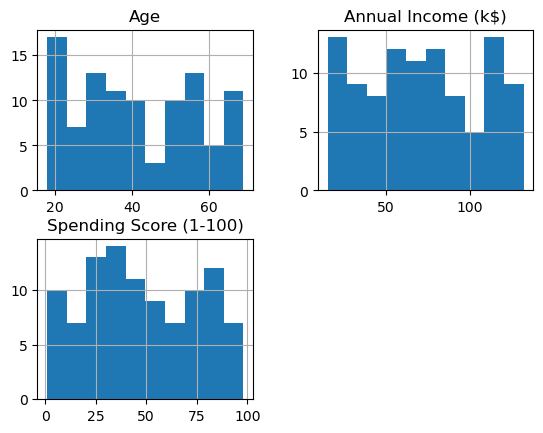

In [80]:
# Code cell for Step 2.2
# Show histograms of a couple of key variables.
viz = df[['Age','Annual Income (k$)','Spending Score (1-100)','Customer Segment']]
viz.hist()
plt.show()

In [81]:
# Code cell for Step 2.3
# Normalize the variables for the machine learning model
#This will be my dependent vairables

X = df [['Age','Annual Income (k$)','Spending Score (1-100)']].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X = [0:5]
print(X)

[[ 1.32154804  0.66557978  1.11191034]
 [ 1.51560796 -1.26363698  1.03834697]
 [-1.52466408  1.77634095  0.33949495]
 [-1.33060417  0.84096313 -1.13177245]
 [-1.33060417 -0.24056748 -0.83751897]
 [ 0.99811484 -0.21133693 -0.65361055]
 [-0.94248433  0.37327421 -0.94786403]
 [-0.29561794 -0.44518138 -0.80073729]
 [-0.16624466 -0.62056473  1.2222554 ]
 [ 1.70966787  0.22712143  0.4866217 ]
 [ 0.80405492  1.1332687   0.52340338]
 [-0.03687138  0.37327421  1.33260046]
 [-1.13654425  1.10403814 -0.50648381]
 [ 0.02781525 -1.64363422 -0.54326549]
 [ 0.02781525  1.65941873  0.85443855]
 [-0.74842441 -0.18210637  1.40616383]
 [-1.45997745 -0.59133417 -0.58004718]
 [ 0.9334282  -0.64979528 -1.24211751]
 [ 0.99811484 -0.24056748  0.89122023]
 [-0.03687138  1.07480758  0.33949495]
 [ 1.45092132 -1.55594255 -0.83751897]
 [ 0.02781525  1.22096037  1.18547372]
 [-0.42499122 -0.41595083 -0.21223032]
 [ 0.86874156  0.60711867 -1.05820908]
 [ 0.09250189  1.63018817 -0.24901201]
 [-0.68373778  1.36711315

In [82]:
#This will be my independet variable
y = df['Customer Segment'].values
y[0:5]

df.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Customer Segment
0,62,94,78,Segment B
1,65,28,76,Segment B
2,18,132,57,Segment B
3,21,100,17,Segment A
4,21,63,25,Segment A
5,57,64,30,Segment A
6,27,84,22,Segment A
7,37,56,26,Segment A
8,39,50,81,Segment A
9,68,79,61,Segment B


### Step 3: Train-Test Split

Split the data into training and testing sets.

In [125]:
# Code cell for Step 3
# Split the data using the 80/20 rule.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80, 3) (80,)
Test set: (20, 3) (20,)


### Step 4: Building and Training the Model

Build the KNN model using sklearn and train it on the training set. 

In [126]:
# Code cell for Step 4
# Build and train your KNN model here
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6
Test set Accuracy:  0.15


### Step 5: Predictions and Evaluations

Use your trained model to make predictions on the test set and evaluate the model's performance.

In [127]:
# Code cell for Step 5
# Make predictions and evaluate your model here
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [128]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Segment A', 'Segment C', 'Segment A', 'Segment B', 'Segment B'],
      dtype=object)

### Step 6: Evaluate Different Ks (advanced).

Use a python looping structure to evaluate different Ks and determine the optimal value of `k` for the KNN model. <br>
Plot the model accuracy versus the K value, including  <br>
Plot the model error rate versus the K value. <br>

Briefly interpret these two charts.

In [136]:
# Code cell for Step 6.1
# Evaluate different Ks and determine the optimal value of k for the KNN model.
# write your code here

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict- the highest k is the shape of your data frame; NOT, your whole data set.
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    #This line calculates the standard error of the model's predictions by dividing the standard deviation 
    #of the boolean comparison between predicted and actual values (yhat == y_test) by the square root of 
    #the number of predictions, and stores it in the std_acc array starting at index n-1.
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
#std_acc


array([0.35, 0.1 , 0.3 , 0.15, 0.35, 0.4 , 0.35, 0.35, 0.4 , 0.3 , 0.3 ])

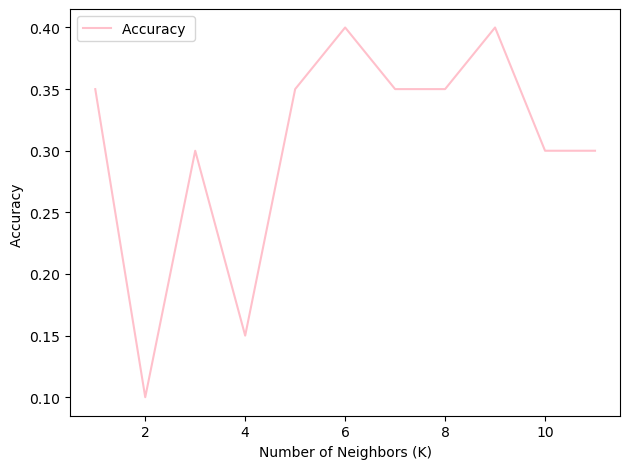

In [137]:
# Code cell for Step 6.2
# Plot the model accuracy versus the K value, including shaded areas representing the variability of accuracy within 1 standard deviation from the mean, 
# and 3 standard deviations from the mean, respectively.

plt.plot(range(1,Ks),mean_acc,'pink')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [138]:
# Code cell for Step 6.3
# Plot the model error rate versus the K value, including shaded areas representing the variability of error rate within 1 standard deviation from the mean, 
# and 3 standard deviations from the mean, respectively.
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict- the highest k is the shape of your data frame; NOT, your whole data set.
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    #This line calculates the standard error of the model's predictions by dividing the standard deviation 
    #of the boolean comparison between predicted and actual values (yhat == y_test) by the square root of 
    #the number of predictions, and stores it in the std_acc array starting at index n-1.
    std_acc[n-1]=np.std(yhat!=y_test)/np.sqrt(yhat.shape[0])

mean_acc
#std_acc


array([0.35, 0.1 , 0.3 , 0.15, 0.35, 0.4 , 0.35, 0.35, 0.4 , 0.3 , 0.3 ])

In [139]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.4 with k= 6


Briefly interpret these two charts here. What's the relationship between these two charts?





### Summary and Research Questions.

1) Discuss the performance of the model and the effect of different k values.
2) Based on the plots of model accuracy and error rate versus k value, why do you think accuracy tends to stabilize beyond a certain value of k?
3) 
How might the choice of k affect the model's performance on unseen data, and what strategies could you use to mitigate overfitting or underfitting with respect to k?

Write your answers here.



In [ ]:
#The k with the best accuracy is k=6, with an accouracy of 0.4! The error rate is the y axis, and when we initially 
#caluclated the y == y hat, however it needs to be converted into y != yhat.
#I think the model tends to stablize around k=6 because of the y hat value. The y hat value is the predicted value, and 
#the y value is the target, and the closer the precited value is to the y, our model will have less error, and higher accuracy.
#Ks value determines the model positioning, and you can observe the trained model and predict the k, and not the whole data set!